<b>Data mining project - 2020/21</b><br>
<b>Author</b>: [Alexandra Bradan](https://github.com/alexandrabradan)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 07/01/2021<b>

In [131]:
%matplotlib inline

# general libraries
import sys
import math
import operator
import itertools
import pydotplus
import collections
import missingno as msno
from pylab import MaxNLocator
from collections import Counter
from collections import OrderedDict

from collections import defaultdict
from IPython.display import Image

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import arange
from numpy import unique
from numpy import argmax
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer

from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.pipeline import make_pipeline as imbmake_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, recall_score, precision_score, classification_report, roc_auc_score 

In [132]:
from fim import apriori

In [133]:
data_directory = "../../../data/"
TR_impunted_file = data_directory + "Impunted_Train_HR_Employee_Attrition.csv"
TS_impunted_file = data_directory + "Impunted_Test_HR_Employee_Attrition.csv"
TR_not_impunted = data_directory + "Not_Impunted_Train_HR_Employee_Attrition.csv"
TS_not_impunted = data_directory + "Cleaned_Test_HR_Employee_Attrition.csv"

<h6>Impunted TR Dataframe</h6>

In [134]:
df_impunted = pd.read_csv(TR_impunted_file, sep=",") 
df_impunted.shape

(883, 30)

In [135]:
to_drop = ["MaritalStatus", "EducationField", "Department", "YearsSinceLastPromotion", "HourlyRate", "MonthlyRate"]

# drop features 
for column_name in to_drop:
    del df_impunted[column_name]
    
# check dropping output
print(df_impunted.shape)

(883, 24)


In [136]:
df_impunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       883 non-null    int64  
 1   Attrition                 883 non-null    object 
 2   BusinessTravel            883 non-null    object 
 3   DistanceFromHome          883 non-null    int64  
 4   Education                 883 non-null    int64  
 5   EnvironmentSatisfaction   883 non-null    int64  
 6   Gender                    883 non-null    object 
 7   JobInvolvement            883 non-null    int64  
 8   JobLevel                  883 non-null    int64  
 9   JobRole                   883 non-null    object 
 10  JobSatisfaction           883 non-null    int64  
 11  MonthlyIncome             883 non-null    int64  
 12  NumCompaniesWorked        883 non-null    int64  
 13  OverTime                  883 non-null    object 
 14  PercentSal

<h6>Not-impunted TR DataFrame</h6>

In [137]:
df_not_impunted = pd.read_csv(TR_not_impunted, sep=",") 
df_not_impunted.shape

(883, 30)

In [138]:
to_drop = ["MaritalStatus", "EducationField", "Department", "YearsSinceLastPromotion", "HourlyRate", "MonthlyRate"]

# drop features 
for column_name in to_drop:
    del df_not_impunted[column_name]
    
# check dropping output
print(df_not_impunted.shape)

(883, 24)


<h6> Impunted TS DataFrame </h6>

In [139]:
df_ts = pd.read_csv(TS_impunted_file, sep=",") 
df_ts.shape

(219, 24)

In [140]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       219 non-null    int64  
 1   Attrition                 219 non-null    object 
 2   BusinessTravel            219 non-null    object 
 3   DistanceFromHome          219 non-null    int64  
 4   Education                 219 non-null    int64  
 5   EnvironmentSatisfaction   219 non-null    int64  
 6   Gender                    219 non-null    object 
 7   JobInvolvement            219 non-null    int64  
 8   JobLevel                  219 non-null    int64  
 9   JobRole                   219 non-null    object 
 10  JobSatisfaction           219 non-null    int64  
 11  MonthlyIncome             219 non-null    int64  
 12  NumCompaniesWorked        219 non-null    int64  
 13  OverTime                  219 non-null    object 
 14  PercentSal

<h6> Not-impnted TS DataFrame </h6>

In [141]:
df_ts_not_impunted = pd.read_csv(TS_not_impunted, sep=",") 
df_ts_not_impunted.shape

del df_ts_not_impunted["Department"]
del df_ts_not_impunted["MonthlyRate"]


to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["YearsAtCompany"] > 20]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["YearsInCurrentRole"] > 16]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["MonthlyHours"] > 590.9767441860465]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

df_ts_not_impunted.shape

dropped rows = 	8
dropped rows = 	2
dropped rows = 	7


(219, 24)

In [142]:
df_ts_not_impunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       191 non-null    float64
 1   Attrition                 219 non-null    object 
 2   BusinessTravel            202 non-null    object 
 3   DistanceFromHome          219 non-null    int64  
 4   Education                 219 non-null    int64  
 5   EnvironmentSatisfaction   219 non-null    int64  
 6   Gender                    208 non-null    object 
 7   JobInvolvement            219 non-null    int64  
 8   JobLevel                  219 non-null    int64  
 9   JobRole                   219 non-null    object 
 10  JobSatisfaction           219 non-null    int64  
 11  MonthlyIncome             168 non-null    float64
 12  NumCompaniesWorked        219 non-null    int64  
 13  OverTime                  219 non-null    object 
 14  PercentSal

<h2> Continuos variables discretisation with K-Means</h2>
K-Means => similar bins' size => IBM's Age and opportunity equity 

In [143]:
df_converted = df_impunted.copy()
df_ts_conv = df_ts.copy()

In [144]:
def print_performed_encoding(column_name, train_encoded):
    column_index = df_impunted.columns.get_loc(column_name)
    encoding_info = {}
    for enc, i in zip(train_encoded, range(0, len(train_encoded))):
        try:
            tmp_list = encoding_info[str(enc)]
            tmp_list.append(df_impunted.iloc[i, column_index])
            encoding_info[str(enc)] = tmp_list
        except KeyError:
            encoding_info[str(enc)] = [df_impunted.iloc[i, column_index]]
            
    for key, value in encoding_info.items():
        min_value = min(value)
        max_value = max(value)
        print(column_name, key, "[%s-%s]" %(min_value, max_value),sep="\t")

In [145]:
cont_variables = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                 "YearsAtCompany", "YearsInCurrentRole", "TaxRate", "MonthlyHours", "OverallSatisfaction"]

for column_name in cont_variables:
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans').fit(df_converted[[column_name]])
    train_encoded = discretizer.transform(df_converted[[column_name]]).astype(int)
    df_converted[column_name] = train_encoded
    df_ts_conv[column_name] = discretizer.transform(df_ts_conv[[column_name]]).astype(int)
    print_performed_encoding(column_name, train_encoded)

Age	[3]	[48-60]
Age	[1]	[31-38]
Age	[0]	[18-30]
Age	[2]	[39-47]
DistanceFromHome	[1]	[6-13]
DistanceFromHome	[0]	[1-5]
DistanceFromHome	[2]	[14-21]
DistanceFromHome	[3]	[22-29]
MonthlyIncome	[1]	[7094-13888]
MonthlyIncome	[0]	[1009-6992]
MonthlyIncome	[2]	[14004-20520]
MonthlyIncome	[3]	[20933-26997]
NumCompaniesWorked	[3]	[7-9]
NumCompaniesWorked	[0]	[0-2]
NumCompaniesWorked	[1]	[3-4]
NumCompaniesWorked	[2]	[5-6]
PercentSalaryHike	[1]	[15-18]
PercentSalaryHike	[0]	[11-14]
PercentSalaryHike	[3]	[22-25]
PercentSalaryHike	[2]	[19-21]
YearsAtCompany	[1]	[6-10]
YearsAtCompany	[0]	[0-5]
YearsAtCompany	[2]	[11-14]
YearsAtCompany	[3]	[15-20]
YearsInCurrentRole	[1]	[5-8]
YearsInCurrentRole	[0]	[0-4]
YearsInCurrentRole	[2]	[9-12]
YearsInCurrentRole	[3]	[13-16]
TaxRate	[1]	[0.2033107599699022-0.4878233954330433]
TaxRate	[2]	[0.4902649218001915-0.7143783124261257]
TaxRate	[3]	[0.7168701095461659-0.9513959334891722]
TaxRate	[0]	[0.0-0.20014044943820225]
MonthlyHours	[1]	[151.64893617021278-264.325

In [146]:
for column_name in list(df_converted.columns):
    df_converted[column_name] = df_converted[column_name].astype(str) + "_" + column_name
    df_ts_conv[column_name] = df_ts_conv[column_name].astype(str) + "_" + column_name

In [147]:
# transaction creation 
df_db = df_converted.values.tolist()
df_ts_db = df_ts_conv.values.tolist()

<h6> Missing values TR and TS discretisation </h6>

In [148]:
df_not_impunted_converted = df_not_impunted.copy()
df_ts_not_imp_conv = df_ts_not_impunted.copy()

In [149]:
cont_variables = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                 "YearsAtCompany", "YearsInCurrentRole", "TaxRate", "MonthlyHours", "OverallSatisfaction"]

for column_name in cont_variables:
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans').fit(df_impunted[[column_name]])
    train_encoded = discretizer.transform(df_impunted[[column_name]]).astype(int)
    df_not_impunted_converted[column_name] = train_encoded
    df_ts_not_imp_conv[column_name] = discretizer.transform(df_ts[[column_name]]).astype(int)
    # print_performed_encoding(column_name, train_encoded)

In [150]:
for column_name in list(df_converted.columns):
    df_not_impunted_converted[column_name] = df_not_impunted_converted[column_name].astype(str) + "_" + column_name
    df_ts_not_imp_conv[column_name] = df_ts_not_imp_conv[column_name].astype(str) + "_" + column_name

In [151]:
missing_numeric_values_columns = ["Age", "YearsAtCompany", "MonthlyIncome", "TaxRate", "TrainingTimesLastYear"]
for column_name in missing_numeric_values_columns:
    for i in range(0, len(df_not_impunted)):
        column_index = df_not_impunted.columns.get_loc(column_name)
        if df_not_impunted.iloc[i, column_index] >= 0:
            pass
        else:
            df_not_impunted_converted.iloc[i, column_index] =  df_not_impunted.iloc[i, column_index]
            
for column_name in missing_numeric_values_columns:
    for i in range(0, len(df_ts_not_impunted)):
        column_index = df_ts_not_impunted.columns.get_loc(column_name)
        if df_ts_not_impunted.iloc[i, column_index] >= 0:
            pass
        else:
            df_ts_not_imp_conv.iloc[i, column_index] = df_ts_not_impunted.iloc[i, column_index]

In [152]:
missing_categorical_values_columns = ["BusinessTravel", "Gender"]
for column_name in missing_categorical_values_columns:
    for i in range(0, len(df_not_impunted)):
        column_index = df_not_impunted.columns.get_loc(column_name)
        if df_not_impunted.iloc[i, column_index] != "Male" and \
        df_not_impunted.iloc[i, column_index] != "Female" and \
        df_not_impunted.iloc[i, column_index] != "Travel_Rarely" and \
        df_not_impunted.iloc[i, column_index] != "Travel_Frequently" and \
        df_not_impunted.iloc[i, column_index] != "Non-Travel":
            df_not_impunted_converted.iloc[i, column_index] =  df_not_impunted.iloc[i, column_index]
            
for column_name in missing_categorical_values_columns:
    for i in range(0, len(df_ts_not_impunted)):
        column_index = df_ts_not_impunted.columns.get_loc(column_name)
        if df_ts_not_impunted.iloc[i, column_index] != "Male" and \
        df_ts_not_impunted.iloc[i, column_index] != "Female" and \
        df_ts_not_impunted.iloc[i, column_index] != "Travel_Rarely" and \
        df_ts_not_impunted.iloc[i, column_index] != "Travel_Frequently" and \
        df_ts_not_impunted.iloc[i, column_index] != "Non-Travel":
            df_ts_not_imp_conv.iloc[i, column_index] = df_ts_not_impunted.iloc[i, column_index]

<h1> Comparison between frequent, maximal and closed itemsets </h1>

- a **frequent itemsets** if its support is greater than or equal to the minimum value defined for
this measure;
- a **maximal itemset** if none of its immediate supersets is frequent;
- a **closed itemset**, if none of its immediate supersets has the same support as that of the itemset.


Remember also that given an association rule X -> Y, where X is a k-itemset, with k=2,...,n_features and Y is a 1-itemset ({"Yes_Attrtion"} or {"No_Attrition"}):
- **support(XuY) = support_count(XuY) / 883**;
- **confidence(XuY) = support_count(XuY) / support_count(X)**;
- **lift(XuY) = confidence(XuY) / support_count(Y)**

Additionally, since in our dataset employees leaving are 153/883 * 100 = 17.33 % we will search Yes_Attrition ARs having:

- support \in [1, 18]
- confidence \in [10, 20, 30, 40, 50, 60, 70, 80, 90]
and computing at the same time the lift.

In [153]:
# help(apriori)

In [154]:
# zmin_range = range(2, len(df_converted.columns))  # k = 2,...,n_features 
zmin_range = range(4, 10)  # k = 2,...,n_features 
support_range = [1]
confidence_range = range(40, 101, 5)

Saving frequent, closed and maximal info in a global dict having the following format:
global_itemsets_info = {'z_min': {'min_supp': {'itemset_type': len(itemsets}}}

In [155]:
global_itemsets_info = {}
for zmin in zmin_range:
    global_itemsets_info[str(zmin)] = {}
    for supp in support_range:
        global_itemsets_info[str(zmin)][str(supp)] = {}
        for conf in confidence_range:
            global_itemsets_info[str(zmin)][str(supp)][str(conf)] = {}
            global_itemsets_info[str(zmin)][str(supp)][str(conf)]["r"] = 0
            global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"] = []

In [156]:
itemset_types = ['r']

for itemset_type in itemset_types:
    for zmin in zmin_range:
        for supp in support_range:
            for conf in confidence_range:
                print("zmin=%d" %zmin, "supp=%d" %supp, "conf=%d" %conf)
                itemsets = apriori(df_db, supp=supp, zmin=zmin, conf=conf, target=itemset_type, report='ascl') 
                print(len(itemsets))
                # yes_rules = 0
                yes_lifts = []
                if len(itemsets) > 0:
                    for itemset in itemsets:
                        if "Yes_Attrition" in itemset[0] or "Yes_Attrition" in str(itemset[1]):
                            lift = itemset[5]
                            global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(itemset_type)] += 1
                            yes_lifts.append(lift)
                # print('Number of %s itemsets for zmin=%s, supp=%s:' % (itemset_type, zmin, supp), yes_rules)
                global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"] = yes_lifts        
        print()

zmin=4 supp=1 conf=40
50203027
zmin=4 supp=1 conf=45
37076733
zmin=4 supp=1 conf=50
32674981
zmin=4 supp=1 conf=55
24744513
zmin=4 supp=1 conf=60
19207311
zmin=4 supp=1 conf=65
14441260
zmin=4 supp=1 conf=70
10418976
zmin=4 supp=1 conf=75
7645633
zmin=4 supp=1 conf=80
4983299
zmin=4 supp=1 conf=85
2973368
zmin=4 supp=1 conf=90
1881422
zmin=4 supp=1 conf=95
835748
zmin=4 supp=1 conf=100
801397

zmin=5 supp=1 conf=40
49248741
zmin=5 supp=1 conf=45
36333310
zmin=5 supp=1 conf=50
32040818
zmin=5 supp=1 conf=55
24263094
zmin=5 supp=1 conf=60
18829003
zmin=5 supp=1 conf=65
14164835
zmin=5 supp=1 conf=70
10220038
zmin=5 supp=1 conf=75
7506362
zmin=5 supp=1 conf=80
4894110
zmin=5 supp=1 conf=85
2922809
zmin=5 supp=1 conf=90
1851397
zmin=5 supp=1 conf=95
823695
zmin=5 supp=1 conf=100
791571

zmin=6 supp=1 conf=40
44046889
zmin=6 supp=1 conf=45
32337676
zmin=6 supp=1 conf=50
28585138
zmin=6 supp=1 conf=55
21652949
zmin=6 supp=1 conf=60
16761129
zmin=6 supp=1 conf=65
12634810
zmin=6 supp=1 conf=7

In [157]:
def draw_multi_confidence_hist():
    y_r = [0]*len(confidence_range)
    
    for zmin in zmin_range:
        for supp in support_range:
                for conf, i in zip(confidence_range, range(0, len(confidence_range))):
                    for itemset_type in itemset_types:
                        y_r[i] += int(global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(itemset_type)])
    
    plt.ticklabel_format(style = 'plain')   
    plt.bar(confidence_range, y_r, ec="white", width=5)
    plt.title("Number of Yes_Attrition rules for confidence thresholds")
    plt.xlabel("% confidence")
    plt.ylabel("# rules")
    plt.show()

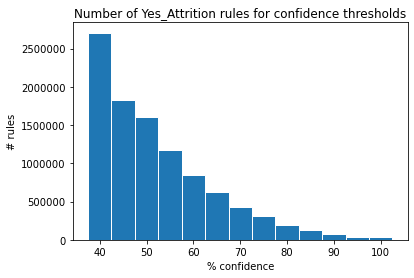

In [158]:
draw_multi_confidence_hist()

In [161]:
def draw_multi_lift_hist():
    y_r = []
    
    for zmin in zmin_range:
        for supp in support_range:
            for conf in confidence_range:
                y_r += global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"]
                
    plt.ticklabel_format(style='plain')            
    plt.hist(y_r, ec="white", width=0.2, log=True)
    plt.xlim([0.0, 5])
    plt.title("Number of Yes_Attrition rules for lift values")
    plt.xlabel("lift")
    plt.ylabel("# rules")
    plt.show()

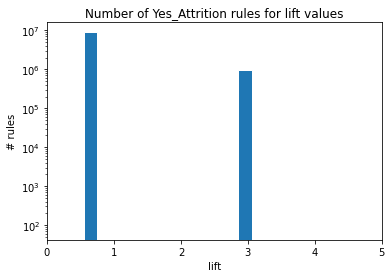

In [162]:
draw_multi_lift_hist()

<h2> Print rules with highest confidence</h2>

In [119]:
global_itemsets_info = {}
for zmin in zmin_range:
    global_itemsets_info[str(zmin)] = {}
    for supp in support_range:
        global_itemsets_info[str(zmin)][str(supp)] = {}
        for conf in confidence_range:
            global_itemsets_info[str(zmin)][str(supp)][str(conf)] = {}
            global_itemsets_info[str(zmin)][str(supp)][str(conf)]["r"] = []
            global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"] = []

In [120]:
itemset_types = ['r']

for itemset_type in itemset_types:
    for zmin in zmin_range:
        for supp in support_range:
            for conf in confidence_range:
                itemsets = apriori(df_db, supp=supp, zmin=zmin, conf=conf, target=itemset_type, report='ascl')  
                print('Number of %s itemsets for zmin=%s, supp=%s:' % (itemset_type, zmin, supp), len(itemsets))
                # update global dict
                yes_rules = []
                yes_lifts = []
                if len(itemsets) > 0:
                    for itemset in itemsets:
                        if "Yes_Attrition" in itemset[0] or "Yes_Attrition" in str(itemset[1]):
                            antecedents = itemset[1]
                            conseguent = itemset[0]
                            lift = itemset[5]
                            rule = antecedents + (conseguent,)  # post-pend conseguent to antecedents
                            global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(itemset_type)].append(rule)
                            global_itemsets_info[str(zmin)][str(supp)][str(conf)]["l"].append(lift)
                            yes_rules.append(itemset)
                print('Number of %s itemsets for zmin=%s, supp=%s:' % (itemset_type, zmin, supp), len(yes_rules))   
        print()

Number of r itemsets for zmin=4, supp=1: 50203027
Number of r itemsets for zmin=4, supp=1: 822447
Number of r itemsets for zmin=4, supp=1: 37076733
Number of r itemsets for zmin=4, supp=1: 566401
Number of r itemsets for zmin=4, supp=1: 32674981
Number of r itemsets for zmin=4, supp=1: 493219
Number of r itemsets for zmin=4, supp=1: 24744513
Number of r itemsets for zmin=4, supp=1: 359580
Number of r itemsets for zmin=4, supp=1: 19207311
Number of r itemsets for zmin=4, supp=1: 264882
Number of r itemsets for zmin=4, supp=1: 14441260
Number of r itemsets for zmin=4, supp=1: 194075
Number of r itemsets for zmin=4, supp=1: 10418976
Number of r itemsets for zmin=4, supp=1: 135316
Number of r itemsets for zmin=4, supp=1: 7645633
Number of r itemsets for zmin=4, supp=1: 98249
Number of r itemsets for zmin=4, supp=1: 4983299
Number of r itemsets for zmin=4, supp=1: 62982
Number of r itemsets for zmin=4, supp=1: 2973368
Number of r itemsets for zmin=4, supp=1: 38017
Number of r itemsets for z

<h6> Greatest confidence rules print </h6>

In [121]:
for itemset_type in itemset_types:

    tmp_conf_dict = {}
    for zmin, value in global_itemsets_info.items(): 
        for supp, value2 in global_itemsets_info[str(zmin)].items():
            for conf, value2 in global_itemsets_info[str(zmin)][str(supp)].items():
                if len(global_itemsets_info[str(zmin)][str(supp)][str(conf)][itemset_type]) > 0:
                    tmp_conf_dict[str(conf)] = global_itemsets_info[str(zmin)][str(supp)][str(conf)][itemset_type][0]

    # ordering dict in descenting values (confidence)
    int_docs_info = {int(k) : v for k, v in tmp_conf_dict.items()}
    conf_dict = OrderedDict(sorted(int_docs_info.items(), key=lambda kv: kv[0], reverse=True))
    print("%s SUPERSETS WITH GREATEST CONFIDENCE:" % itemset_type)
    for key, value in conf_dict.items():
        print("zmin=%s" % len(conf_dict[key][0]), "confidence=%s" % key, conf_dict[key])
        print()

    print()

r SUPERSETS WITH GREATEST CONFIDENCE:
zmin=13 confidence=100 ('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '1_JobLevel', '0_StockOptionLevel', '0_NumCompaniesWorked', 'Male_Gender', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel')

zmin=13 confidence=95 ('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '1_JobLevel', '0_StockOptionLevel', '0_NumCompaniesWorked', 'Male_Gender', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel')

zmin=13 confidence=90 ('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '1_JobLevel', '0_StockOptionLevel', '0_NumCompaniesWorked', 'Male_Gender', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel')

zmin=13 confidence=85 ('Yes_Attrition', '1_EnvironmentSatisfaction', '1_JobLevel', '0_StockOptionLevel', '0_NumCompaniesWorked', '0_YearsInCurrentRole', '0_MonthlyIncome', 'Travel_Rarely_BusinessTravel', 'Male_Gender')

zmin=13 confidence=80 ('Yes_Attrition', '1_EnvironmentSatisfaction', '1_JobLevel', '0_StockOptionLevel', '0_NumCompan

In [122]:
df_converted[(df_converted["Attrition"] == "Yes_Attrition") & 
          (df_converted["TaxRate"] == "3_TaxRate") & 
          (df_converted["NumCompaniesWorked"] == "0_NumCompaniesWorked") & 
          (df_converted["OverTime"] == "No_OverTime") & 
           (df_converted["MonthlyIncome"] == "0_MonthlyIncome") & 
           (df_converted["BusinessTravel"] == "Travel_Rarely_BusinessTravel")].shape

(10, 24)

In [123]:
df_converted[(df_converted["Attrition"] == "No_Attrition") & 
          (df_converted["TaxRate"] == "3_TaxRate") & 
          (df_converted["NumCompaniesWorked"] == "0_NumCompaniesWorked") & 
          (df_converted["OverTime"] == "No_OverTime") & 
           (df_converted["MonthlyIncome"] == "0_MonthlyIncome") & 
           (df_converted["BusinessTravel"] == "Travel_Rarely_BusinessTravel")].shape

(79, 24)

<h2> Print rules with highest lift</h2>

In [124]:
global_itemsets_info = {}
for zmin in zmin_range:
    global_itemsets_info[str(zmin)] = {}
    for supp in support_range:
        global_itemsets_info[str(zmin)][str(supp)] = {}
        for conf in confidence_range:
            global_itemsets_info[str(zmin)][str(supp)][str(conf)] = {}

In [125]:
itemset_types = ['r']

for itemset_type in itemset_types:
    for zmin in zmin_range:
        for supp in support_range:
            for conf in confidence_range:
                itemsets = apriori(df_db, supp=supp, zmin=zmin, conf=conf, target=itemset_type, report='ascl')  
                print('Number of %s itemsets for zmin=%s, supp=%s:' % (itemset_type, zmin, supp), len(itemsets))
                # update global dict
                for itemset in itemsets:
                    if "Yes_Attrition" in itemset[0]:
                        antecedents = itemset[1]
                        conseguent = itemset[0]
                        lift = itemset[5]
                        rule = antecedents + (conseguent,)  # post-pend conseguent to antecedents
                        try:
                            tmp_list = global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(lift)]
                            tmp_list.append(rule)
                            global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(lift)] = tmp_list
                        except KeyError:
                            global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(lift)] = [rule]
        print()

Number of r itemsets for zmin=4, supp=1: 50203027
Number of r itemsets for zmin=4, supp=1: 37076733
Number of r itemsets for zmin=4, supp=1: 32674981
Number of r itemsets for zmin=4, supp=1: 24744513
Number of r itemsets for zmin=4, supp=1: 19207311
Number of r itemsets for zmin=4, supp=1: 14441260
Number of r itemsets for zmin=4, supp=1: 10418976
Number of r itemsets for zmin=4, supp=1: 7645633
Number of r itemsets for zmin=4, supp=1: 4983299
Number of r itemsets for zmin=4, supp=1: 2973368
Number of r itemsets for zmin=4, supp=1: 1881422
Number of r itemsets for zmin=4, supp=1: 835748
Number of r itemsets for zmin=4, supp=1: 801397

Number of r itemsets for zmin=5, supp=1: 49248741
Number of r itemsets for zmin=5, supp=1: 36333310
Number of r itemsets for zmin=5, supp=1: 32040818
Number of r itemsets for zmin=5, supp=1: 24263094
Number of r itemsets for zmin=5, supp=1: 18829003
Number of r itemsets for zmin=5, supp=1: 14164835
Number of r itemsets for zmin=5, supp=1: 10220038
Number 

<h6> Greatest confidence rules print </h6>

In [126]:
for itemset_type in itemset_types:

    tmp_lift_dict = {}
    for zmin, value in global_itemsets_info.items(): 
        for supp, value2 in global_itemsets_info[str(zmin)].items():
            for conf, value2 in global_itemsets_info[str(zmin)][str(supp)].items():
                for lift, value3, in global_itemsets_info[str(zmin)][str(supp)][str(conf)].items():
                    tmp_lift_dict[str(lift)] = global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(lift)][0]

    # ordering dict in descenting values (lift)
    int_docs_info = {float(k) : v for k, v in tmp_lift_dict.items()}
    lift_dict = OrderedDict(sorted(int_docs_info.items(), key=lambda kv: kv[0], reverse=True))
    print("%s SUPERSETS WITH GREATEST LIFT:" % itemset_type)
    for key, value in lift_dict.items():
        print("lift=%s" % key, lift_dict[key], "zmin=%s" % len(lift_dict[key][0]))
        print()

    print()

r SUPERSETS WITH GREATEST LIFT:
lift=5.771241830065359 ('Yes_OverTime', '1_YearsAtCompany', '1_JobLevel', '0_StockOptionLevel', '0_NumCompaniesWorked', 'Male_Gender', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel', 'Yes_Attrition') zmin=12

lift=5.431757016532103 ('Yes_OverTime', '1_YearsAtCompany', '1_JobLevel', '0_NumCompaniesWorked', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel', 'Yes_Attrition') zmin=12

lift=5.386492374727669 ('Yes_OverTime', '1_JobLevel', '0_StockOptionLevel', '0_NumCompaniesWorked', 'Male_Gender', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel', 'Yes_Attrition') zmin=12

lift=5.359010270774976 ('Yes_OverTime', '1_YearsAtCompany', '3_Education', '1_JobLevel', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel', 'Yes_Attrition') zmin=12

lift=5.327300150829562 ('Yes_OverTime', '1_JobLevel', '0_StockOptionLevel', '2_TrainingTimesLastYear', '0_NumCompaniesWorked', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel', 'Yes_Attrition') zmi

<h6>Checking how many items are correlated based on lift</h6> 

In [127]:
count = 0
for zmin, value in global_itemsets_info.items(): 
    for supp, value2 in global_itemsets_info[str(zmin)].items():
        for conf, value2 in global_itemsets_info[str(zmin)][str(supp)].items():
            for lift, value3, in global_itemsets_info[str(zmin)][str(supp)][str(conf)].items():
                if float(lift) >= 1.1:
                    count += len(global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(lift)])
print(count)

1088556


In [128]:
def itemset_validation(itemset):
    res = df_converted[df_converted.columns]
    for i in range(0, len(itemset)):
        if "Attrition" in itemset[i]:
            continue
        elif "BusinessTravel" in itemset[i]:
            column_name = "BusinessTravel"
        else:
            column_name = itemset[i].split("_")[1]
        res = res[res[column_name] == itemset[i]][res.columns]

    res = res["Attrition"]
    yes_indeces = []
    no_indeces = []
    tmp_res_indeces = list(res.index)
    count_yes = 0
    count_no = 0
    for elem, i in zip(res, range(0, len(res))):
        if elem == "Yes_Attrition":
            count_yes += 1
            yes_indeces.append(tmp_res_indeces[i])
        else:
            count_no += 1
            no_indeces.append(tmp_res_indeces[i])
    return count_yes, count_no, yes_indeces, no_indeces

In [129]:
def check_presence_in_set(tmp_set, itemset):
    for itemset_in_set in tmp_set:
        if set(itemset_in_set).issubset(set(itemset)):
            tmp_set.remove(itemset_in_set)
            tmp_set.add(itemset)
            return tmp_set
    tmp_set.add(itemset)
    return tmp_set

In [130]:
biggest_lift_ar_superset = set()
for zmin, value in global_itemsets_info.items(): 
    for supp, value2 in global_itemsets_info[str(zmin)].items():
        for conf, value2 in global_itemsets_info[str(zmin)][str(supp)].items():
            for lift, value3, in global_itemsets_info[str(zmin)][str(supp)][str(conf)].items():
                if float(lift) >= 1.1:
                    for itemset in global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(lift)]:
                        biggest_lift_ar_superset = check_presence_in_set(biggest_lift_ar_superset, itemset)
print("biggest_lift_ar_superset", len(biggest_lift_ar_superset))

KeyboardInterrupt: 

In [ ]:
for itemset in biggest_lift_ar_superset:
    count_yes, count_no, yes_indeces, no_indeces = itemset_validation(itemset)
    if count_yes > count_no:
        print(itemset, "count_yes=%d" % count_yes, "count_no=%d" % count_no)

Since lift isn't performing well we are using confidence to take Yes_Attrition rules.

In [ ]:
tmp_lift_dict = {}
for zmin, value in global_itemsets_info.items(): 
    for supp, value2 in global_itemsets_info[str(zmin)].items():
        for conf, value2 in global_itemsets_info[str(zmin)][str(supp)].items():
            for lift, value3, in global_itemsets_info[str(zmin)][str(supp)][str(conf)].items():
                for itemset in global_itemsets_info[str(zmin)][str(supp)][str(conf)][str(lift)]:
                    if itemset in biggest_lift_ar_superset:
                        try:
                            tmp_list = tmp_lift_dict[str(lift)] 
                            tmp_list.append(itemset)
                        except KeyError:
                            tmp_lift_dict[str(lift)] = [itemset]

# ordering dict in descenting values (lift)
int_docs_info = {float(k) : v for k, v in tmp_lift_dict.items()}
lift_dict = OrderedDict(sorted(int_docs_info.items(), key=lambda kv: kv[0], reverse=True))
print("%s SUPERSETS WITH GREATEST LIFT:" % itemset_type)
for key, value in lift_dict.items():
    print("lift=%s" % key, lift_dict[key], "zmin=%s" % len(lift_dict[key][0]),)
    print()

print()